# 개인분석(영상길이)

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 폰트 설정
import matplotlib.font_manager as fm
path = '/Users/namhunkim/fonts/nanum-gothic/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=path, size=12)

# # 한글 깨짐 방지 <- 맥에서 사용하는 기본 폰트
# from matplotlib import rc
# rc('font', family='NanumGothic')
# plt.rcParams['axes.unicode_minus'] = False

# 그래프의 축과 눈금과 관련된 함수
# plt.tick_params(axis = 'x', direction = 'out', length = 5, pad = 3, labelsize = 10, labelcolor = 'green')

# 그래프의 전체적인 옵션값
# plt.rcParams['figure.figsize'] = (15, 8) # 그림 크기
# plt.rcParams['lines.linewidth'] = 3 # 선 굵기
# plt.rcParams['axes.facecolor'] = 'gray' # 배경 색상
# plt.rcParams['axes.grid'] = False # 격자 유무
# plt.rcParams['font.size'] = 12 # 폰트 크기

In [2]:
# channel_total

url1 = '/Users/namhunkim/Library/CloudStorage/OneDrive-연세대학교(YonseiUniversity)/DSL/EDA/data/main/channel_total.csv'
df1 = pd.read_csv(url1,lineterminator='\n')
df1[100:101]

,channelId,video_time,video_id,when,title,minute_time,seconds_time,open,totalview,subscriber
100,UCRuSxVu4iqTK5kCh90ntAgA,4:07,E8KtwnvDFs0,6개월 전,학폭의 방관자 & 잊을 수 없는 썸남 [총몇명의 사연낭독],4.116667,247.0,2016-10-25,960978508.0,2360000.0


# 업로드날짜(when) 전처리

In [3]:
# when의 구성

data = df1.when.unique()
data.sort()
data

array(['10개월 전', '10년 전', '10분 전', '10시간 전', '10일 전', '11개월 전', '11년 전',
       '11분 전', '11시간 전', '11일 전', '12년 전', '12분 전', '12시간 전', '12일 전',
       '13년 전', '13분 전', '13시간 전', '13일 전', '14년 전', '14분 전', '14시간 전',
       '15분 전', '15시간 전', '16분 전', '16시간 전', '17분 전', '17시간 전', '18분 전',
       '18시간 전', '19분 전', '19시간 전', '1개월 전', '1년 전', '1분 전', '1시간 전',
       '1일 전', '20분 전', '20시간 전', '21분 전', '21시간 전', '22분 전', '22시간 전',
       '23분 전', '23시간 전', '24분 전', '25분 전', '26분 전', '27분 전', '28분 전',
       '29분 전', '2개월 전', '2년 전', '2시간 전', '2일 전', '2주 전', '30분 전',
       '32분 전', '34분 전', '36분 전', '38분 전', '39분 전', '3개월 전', '3년 전',
       '3분 전', '3시간 전', '3일 전', '3주 전', '40분 전', '41분 전', '42분 전',
       '43분 전', '44분 전', '45분 전', '47분 전', '48분 전', '49분 전', '4개월 전',
       '4년 전', '4분 전', '4시간 전', '4일 전', '4주 전', '50분 전', '52분 전', '53분 전',
       '54분 전', '54초 전', '55분 전', '56분 전', '57분 전', '58분 전', '59분 전',
       '5개월 전', '5년 전', '5분 전', '5시간 전', '5일 전', '6개월 전', '6년 전', '6분 전',
     

In [4]:
# '최초 공개일'이 들어간 영상의 갯수
count = 0
for i in list(df1.when.values):
    if '최초 공개일' in i:
        count += 1
print(count) # <- 11개임으로 데이터를 제거해버리자

11


In [5]:
# 영상에 포함된 말 찾기

data = []

for i in list(df1.when.values):
    if '최초 공개일' not in i:
        i = i.split(':')[-1].strip() # ':'이 있는 '스트리밍 시간:' 문자열에서 이것들을 삭제
        i = i.split(' ')[0] # 단어만 가져오기
        if i[-2].isdigit(): # 1개의 단어일 떄(년,분,일,주,초)
            data.append(i[-1])
        else: # 2개의 단어일 때(개월,시간)
            data.append(i[-2:])

data = pd.Series(data).unique()
data.sort()
print(data)

['개월' '년' '분' '시간' '일' '주' '초']


* 개월(month)를 기준으로 전처리를 진행하자.

In [6]:
# 개월로 단위 변환하는 함수

def trans_when(i):
    if '최초 공개일' not in i:
        i = i.split(':')[-1].strip() # ':'이 있는 '스트리밍 시간:' 문자열에서 이것들을 삭제
        i = i.split(' ')[0] # 단어만 가져오기

        if i[-2].isdigit(): # 1개의 단어일 떄(년,주,일,분,초)
            word = i[-1] # 그 단어만 떼온다.
            num = i[:-1] # 숫자만 떼온다.
            if word == '년':
                i = 12*int(num) # ex) 1년이상~2년이하이면 -> 12개월
            else:
                i = 0 # 1개월미만 -> 0개월

        else: # 2개의 단어일 때(개월,시간)
            if '개' in i:
                i = int(i[:-2])
            else:
                i = 1
    else:
        i = np.nan

    return i

In [7]:
pd.concat([df1.when, df1.when.apply(trans_when)], axis=1) # <- 잘 변환된 것 같다.

,when,when
0,10일 전,0.0
1,8개월 전,8.0
2,9개월 전,9.0
3,9개월 전,9.0
4,9개월 전,9.0
...,...,...
217797,7개월 전,7.0
217798,7개월 전,7.0
217799,8개월 전,8.0
217800,8개월 전,8.0


In [8]:
df2 = df1.copy()
df2.when = df2.when.apply(trans_when)
df2.head()

,channelId,video_time,video_id,when,title,minute_time,seconds_time,open,totalview,subscriber
0,UCu9BCtGIEr73LXZsKmoujKw,4:58,u6lyUnhaaqk,0.0,.,4.966667,298.0,2014-08-25,2.683340e+09,3230000.0
1,UCu9BCtGIEr73LXZsKmoujKw,10:45,_LpMHqmScuk,8.0,판결 나왔습니다,10.750000,645.0,2014-08-25,2.683340e+09,3230000.0
2,UCu9BCtGIEr73LXZsKmoujKw,11:53,2eHrT-Fgs78,9.0,현재 재판진행상황,11.883333,713.0,2014-08-25,2.683340e+09,3230000.0
3,UCu9BCtGIEr73LXZsKmoujKw,9:41,6MiItImFYbk,9.0,우리 깐부 맞지?,9.683333,581.0,2014-08-25,2.683340e+09,3230000.0
4,UCu9BCtGIEr73LXZsKmoujKw,SHORTS,QdnvjTQ4X3c,9.0,섹드립논란#Shorts,NaN,NaN,2014-08-25,2.683340e+09,3230000.0


# 데이터 상태 확인하기

In [9]:
df1.columns
# when : 동영상업로드 기간(지금으로부터 얼마전에 업로드 했는지)
# video_time = minute_time = seconds_time
# open : 채널개설일자

Index(['channelId', 'video_time', 'video_id', 'when', 'title', 'minute_time',
       'seconds_time', 'open', 'totalview', 'subscriber'],
      dtype='object')

In [10]:
print('총 채널의 갯수 :', df1.channelId.nunique())
print('채널 당 데이터의 수 :', df1.groupby('channelId').count().video_time.unique())

총 채널의 갯수 : 2636
채널 당 데이터의 수 : [60 90 29 17 30 21 36 42 13 46 15 61 48 58 72 10 63 33 79 66 20 44 25  5
 56 78 82 23 47 41 57 71 22 49 68 28 45 88 51 59 52 32 67 89 80 64 62  6
 54 81 75 69 55 87  8 12 43 38 70  9 85 34 74 19 84 50 37 83 40 39 27  2
 77 26  4 53 24  3 73 16 76 14 65  1 86 31  7 35 11]


In [11]:
idx = np.where(df1.groupby('channelId').count().video_time==1)[0]
print('채널 당 데이터가 1개인 것들의 index :', idx)

채널 당 데이터가 1개인 것들의 index : [1177 1889 1954 2270]


In [12]:
df1.loc[idx,:] # <- 실제 유튜브 채널에 들어가서 관찰해보니 동영상의 수는 1개보다 많았다.
# 아마도 크롤링 상에서 데이터를 잘 가져오지 못한 듯 하다.

,channelId,video_time,video_id,when,title,minute_time,seconds_time,open,totalview,subscriber
1177,UCdTDdygpZKdDew2s1s419iw,29:01,9L6-D6iRZVc,3개월 전,한국 유망주 발재간 보자마자 스카우터 찾는 독일 명문팀 코치… 경악하는 리액션 보니...,29.016667,1741.0,2014-06-08,7.707302e+08,1330000.0
1889,UCLuCG6sPAQX_bhTt1ztN1FQ,3:36,1otwzdqSvTI,7개월 전,새롭게 추가된 메크요들의 유닛 종류는!? // 18회차 | 김득배의 카드실험실 - ...,3.600000,216.0,2019-08-20,3.365672e+07,29700.0
1954,UCg_lS-XS9Fh9I6Rl56Z8fpg,14:00,ii8xY-h6T38,8일 전,누구나 물 위를 걷는 신발ㄷㄷ (마법이 아닙니다),14.000000,840.0,2016-03-16,9.068245e+08,1500000.0
2270,UChQ-VMvdGrYZxviQVMTJOHg,1:53,lygijqJTTYI,3개월 전,[어린이날 도티 팬사인회💛]모두모두 놀러 오세요~~,1.883333,113.0,2012-07-18,2.739324e+09,2360000.0


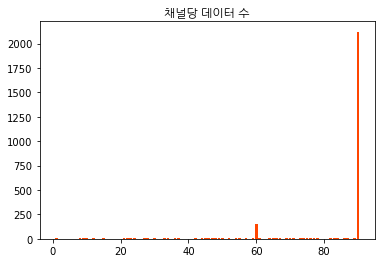

In [13]:
data = df1.groupby('channelId').count().video_time.value_counts()
plt.title('채널당 데이터 수', fontproperties=fontprop)
plt.bar(data.index, data, color='orangered') # 채널 당 데이터수가 대부분 90개이며 60개가 그 다음으로 많았다.
plt.show()

### (1) : 크롤링을 통해 채널 당 데이터 수가 1~90개로 다양하나 대부분이 90개이다.

# 본격적인 동영상 길이 분석

In [14]:
df1.groupby('channelId').count().head()
# 주의! 여기서 vdieo_time = minute_time = seconds_time이지만, 갯수가 다른 이유는
# video_time에서는 short가 count되지만, minute_time과 seconds_time에서는 NaN이 count되지 않기 때문이다.

,video_time,video_id,when,title,minute_time,seconds_time,open,totalview,subscriber
channelId,,,,,,,,,
UC-0229MiVYnQoUxdLJnFl_g,60,60,60,60,38,38,60,60,60
UC-0C8yVGJy-cS4FGlYKelWw,90,90,90,90,90,90,90,90,90
UC-0tICWyA0_AJAVMBHL8GdQ,90,90,90,90,59,59,90,90,90
UC-2Y8dQb0S6DtpxNgAKoJKA,90,90,90,90,88,88,90,90,90
UC-2wa6jvprl7hfCpvw0ULzg,90,90,90,90,90,90,90,90,90


## 1. 크롤링한 인기채널의 동영상들의 영상길이 빈도확인; 영상길이의 공급

### 1-(1). 전체 동영상에 대해 확인

In [15]:
n = len(df1.minute_time)
n

217802

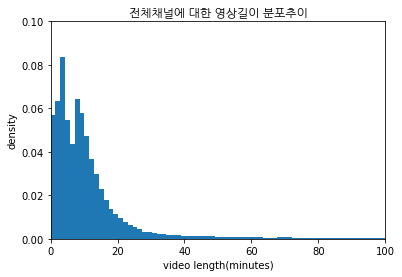

In [16]:
plt.hist(df1.minute_time, bins=1000, density=True)
plt.axis([0, 100, 0, 0.1])
plt.xlabel('video length(minutes)')
plt.ylabel('density')
plt.title('전체채널에 대한 영상길이 분포추이', fontproperties=fontprop)
plt.show()

In [17]:
print('전체 동영상 길이에 대한 정보\n')
print('평균 : %1.2f(분)'%df1.minute_time.mean())
print('중앙값 : %1.2f(분)'%df1.minute_time.median())
print('최빈값 : %1.2f(분)'%df1.minute_time.mode())
print('최댓값 : %1.2f(분)'%df1.minute_time.max())
print('최솟값 : %1.2f(분)'%df1.minute_time.min())

전체 동영상 길이에 대한 정보

평균 : 14.09(분)
중앙값 : 8.28(분)
최빈값 : 8.02(분)
최댓값 : 1441.45(분)
최솟값 : 0.02(분)


In [18]:
for i in [1,8,10,20]:
    print('%d분 이하 영상의 비율 : %1.2f%%'%(i, (df1.minute_time[df1.minute_time<=i].count() / n * 100)))

1분 이하 영상의 비율 : 4.46%
8분 이하 영상의 비율 : 40.09%
10분 이하 영상의 비율 : 52.22%
20분 이하 영상의 비율 : 75.24%


 * 전체적으로 동영상의 길이가 0~20분이다.

### 1-(2). 20분 이하 영상길이의 분포


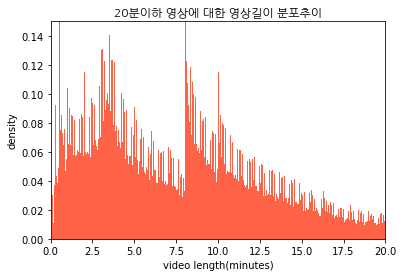

In [19]:
# 20분 이하 영상길이의 분포

group1 = df1.minute_time[df1.minute_time<=20]
plt.hist(group1, bins=500, density=True, color='tomato')
plt.axis([0, 20, 0, 0.15])
plt.xlabel('video length(minutes)')
plt.ylabel('density')
plt.title('20분이하 영상에 대한 영상길이 분포추이', fontproperties=fontprop)
plt.show()

# 20분 이하 영상에 대해서 두 개의 봉우리가 발견되었다.
# 2.5~5분과 7.5~9분 정도이다.
# 그러나 0과 10분 정도에서도 봉우리가 있는 것 같다.
# 따라서 다시 2개의 그룹으로 더 나눠보자.

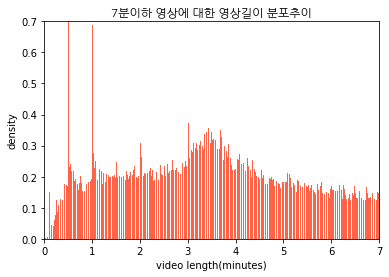

In [20]:
# 0~7분 영상길이의 분포

group1_1 = df1.minute_time[df1.minute_time<=7]
plt.hist(group1_1, bins=600, density=True, color='tomato')
plt.axis([0, 7, 0, 0.7])
plt.xlabel('video length(minutes)')
plt.ylabel('density')
plt.title('7분이하 영상에 대한 영상길이 분포추이', fontproperties=fontprop)
plt.show()

* 3.5분에서 그 비율이 높다.
* 1분도 안되는 영상은 대략 30초와 1분에서 그 비율이 앞도적으로 높다.

In [21]:
step = 10 # 10초간격으로 나눈다.
interval = 0
result = []

# 7분이하의 데이터들을 초(second)로 저장
data = df1.seconds_time.dropna()
data = data[data<=7*60]

while True:
    # 10초 간격의 interval에 포함되는 영상의 갯수
    num = data.apply(lambda x: 1 if interval <= x and x < interval + step else 0).sum()
    result.append(num)
    
    # 7분 이하의 영상에 대해서만 수행
    interval += step
    if (interval>7*60):
        break

# 상위 5개 추출
result = np.array(result)
idx = result.argsort()[::-1][:5]

print('상위 5개의 동영상길이\n')
for i in range(5):
    j = idx[i]
    print('(%d) %1.2f분이상 %1.2f분미만 : %1.2f'%((i+1), step*j/60, (step*j+step)/60, result[j]/result.sum()))

상위 5개의 동영상길이

(1) 3.33분이상 3.50분미만 : 0.04
(2) 3.50분이상 3.67분미만 : 0.04
(3) 1.00분이상 1.17분미만 : 0.04
(4) 0.50분이상 0.67분미만 : 0.04
(5) 3.17분이상 3.33분미만 : 0.03


위에서 그래프로 확인한 것과 같이 7분 이하의 영상의 비율은 다음 3가지 영역에서 가장 비율이 높았다.
* 3.17~3.50분
* 1.00~1.17분
* 0.50~0.76분

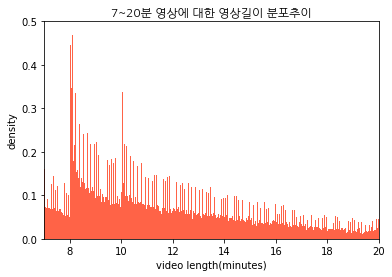

In [22]:
# 마찬가지로 7분이상 20분미만 영상에 대해 같은 분석을 실시한다.

# 0~20분 영상길이의 분포
group1_2 = df1.minute_time.apply(lambda x: np.nan if x<7 else np.nan if x>=20 else x).dropna()
plt.hist(group1_2, bins=600, density=True, color='tomato')
plt.axis([7, 20, 0, 0.5])
plt.xlabel('video length(minutes)')
plt.ylabel('density')
plt.title('7~20분 영상에 대한 영상길이 분포추이', fontproperties=fontprop)
plt.show()

In [23]:
step = 30 # 30초간격으로 나눈다.
interval = 7*60 # 7분부터 시작
result = []

# 7분이상 20분미만의 데이터를 초(seconds)로 저장
data = df1.seconds_time.apply(lambda x: np.nan if x<7*60 else np.nan if x>=20*60 else x).dropna()

while True:
    # 10초 간격의 interval에 포함되는 영상의 갯수
    num = data.apply(lambda x: 1 if interval <= x and x < interval + step else 0).sum()
    result.append(num)
    
    # 7분 이하의 영상에 대해서만 수행
    interval += step
    if (interval>20*60): # 20분 이하
        break

# 상위 5개 추출
result = np.array(result)
idx = result.argsort()[::-1][:5]

print('상위 5개의 동영상길이\n')
for i in range(5):
    j = idx[i]
    print('(%d) %1.2f분이상 %1.2f분미만 : %1.2f'%((i+1), 7+step*j/60, 7+(step*j+step)/60, result[j]/result.sum()))

상위 5개의 동영상길이

(1) 8.00분이상 8.50분미만 : 0.12
(2) 8.50분이상 9.00분미만 : 0.07
(3) 10.00분이상 10.50분미만 : 0.07
(4) 9.00분이상 9.50분미만 : 0.06
(5) 9.50분이상 10.00분미만 : 0.05


* 7~20분 길이의 영상은 대부분 8분과 10분정도의 길이를 가진다.

### 1-(3). 12분 초과 영상길이의 분포


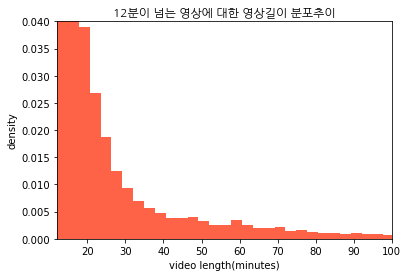

In [24]:
# 20분을 넘어가는 영상길이의 분포

group2 = df1.minute_time[df1.minute_time>12]
plt.hist(group2, bins=500, density=True, color='tomato')
plt.axis([12, 100, 0, 0.04])
plt.xlabel('video length(minutes)')
plt.ylabel('density')
plt.title('12분이 넘는 영상에 대한 영상길이 분포추이', fontproperties=fontprop)
plt.show()

* 12분만 넘어가더라도 영상길이는 기하급수적으로 감소한다.

# 2. 시간의 흐름에 따른 영상길이

### 2-(1) 최근 1년이내 영상길이의 빈도 추이

In [25]:
# df1과 달리 when열을 몇개월전을 기준으로 재가공한 자료 <- df2

df2.head(1)

,channelId,video_time,video_id,when,title,minute_time,seconds_time,open,totalview,subscriber
0,UCu9BCtGIEr73LXZsKmoujKw,4:58,u6lyUnhaaqk,0.0,.,4.966667,298.0,2014-08-25,2.683340e+09,3230000.0


In [26]:
data = df2.loc[:,['when','minute_time']]
data.head(5)

,when,minute_time
0,0.0,4.966667
1,8.0,10.750000
2,9.0,11.883333
3,9.0,9.683333
4,9.0,NaN


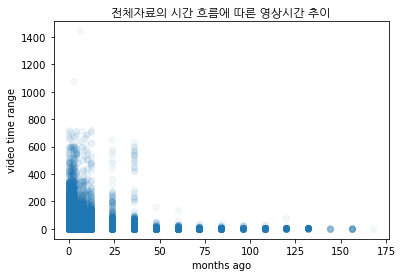

In [27]:
# 전체 자료의 시간 흐름에 따른 영상시간

plt.scatter(data.when.values,data.minute_time.values, alpha=0.05)
plt.xlabel('months ago')
plt.ylabel('video time range')
plt.title('전체자료의 시간 흐름에 따른 영상시간 추이', fontproperties=fontprop)
plt.show()

* 자료의 수가 너무 많이 차이가 나서 확실하게 말하기 어려우나
* 최근 영상은 영상의 시간이 0~400분까지 다양하게 나타난다.

In [28]:
# 전체 데이터를 1년초과와 이하로 나눈다.

data = data.sort_values(by=['when'],ascending=False)
print('전체 데이터 수 : %d'%data.when.count())

# 1년 이하 영상들
idx = np.where(data.when < 12)[0] # 1년이 넘은 영상들의 index
idx
group1 = data.iloc[idx,:]
print('group1(1년이하) 데이터 수 : %d'%group1.when.count())

# 1년 초과 영상들
idx = np.where(data.when >= 12)[0] # 1년이 넘은 영상들의 index <- np.where은 기존 index가 아닌
# 새로운 index를 기준으로 한다.
idx
group2 = data.iloc[idx,:]
print('group2(1년초과) 데이터 수 : %d'%group2.when.count())

# tip) 다른 방법
idx = data.when[data.when>=12].index # 기존 index를 사용하는 방법
group2 = data.loc[idx,:]
print('group2(1년초과) 데이터 수 : %d'%group2.when.count())

전체 데이터 수 : 217791
group1(1년이하) 데이터 수 : 176216
group2(1년초과) 데이터 수 : 41575
group2(1년초과) 데이터 수 : 41575


In [29]:
group1.head()

,when,minute_time
80184,11.0,6.816667
85095,11.0,0.450000
150032,11.0,1.466667
80183,11.0,1.350000
85098,11.0,0.433333


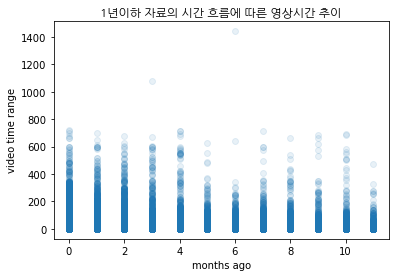

In [30]:
# '1년 이하 영상에 대한 시간흐름의 영상시간 추이
plt.scatter(group1.when.values,group1.minute_time.values, alpha=0.1)
plt.xlabel('months ago')
plt.ylabel('video time range')
plt.title('1년이하 자료의 시간 흐름에 따른 영상시간 추이', fontproperties=fontprop)
plt.show()

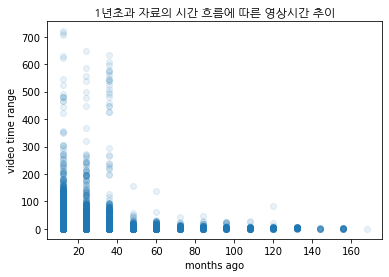

In [31]:
# '1년 초과 영상에 대한 시간흐름의 영상시간 추이
plt.scatter(group2.when.values,group2.minute_time.values, alpha=0.1)
plt.xlabel('months ago')
plt.ylabel('video time range')
plt.title('1년초과 자료의 시간 흐름에 따른 영상시간 추이', fontproperties=fontprop)
plt.show()

* 최근일수록 영상의 길이가 긴 영상들이 꽤 많으며
* 길이가 긴 영상보다는 짧은 영상이 훨씬 많다.

### 2-(2) 최근 1년이내 영상길이의 대푯값 추이

In [32]:
# 각 개월별 대푯값을 추출해서 그래프를 그려보자.
# 1년미만 데이터들의 mean, median, mode의 값

data1 = pd.concat([group1.groupby('when').mean(), group1.groupby('when').median(),
                  group1.groupby(['when']).agg(pd.Series.mode)], axis=1, keys=['mean','median','mode'])
data1

,mean,median,mode
,minute_time,minute_time,minute_time
when,,,
0.0,15.844358,8.033333,0.516667
1.0,15.516397,8.316667,0.516667
2.0,16.409675,9.016667,8.016667
3.0,15.123456,8.833333,8.016667
4.0,15.807558,9.016667,8.016667
5.0,13.450195,8.716667,8.016667
6.0,12.710510,8.616667,8.033333
7.0,13.698115,8.766667,8.016667


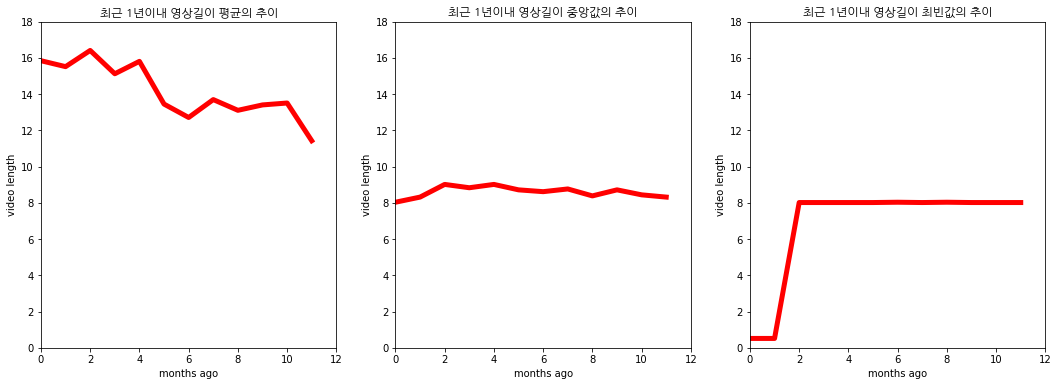

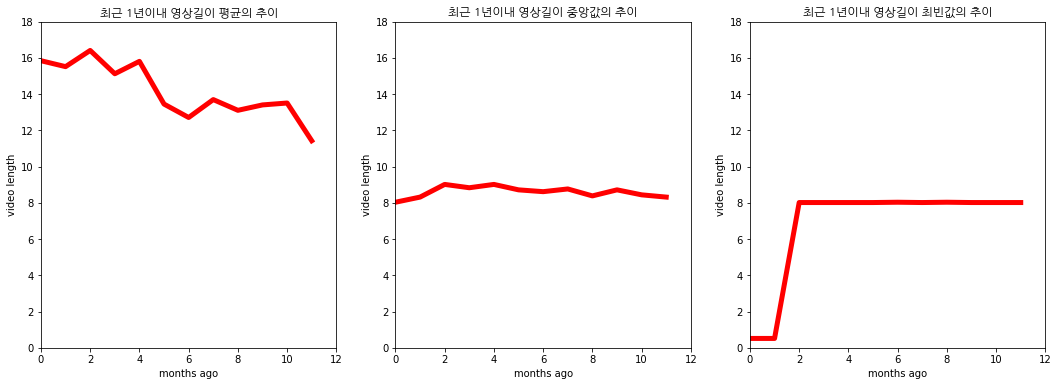

In [33]:
fig = plt.figure(figsize=(18,6))

# 최근 1년이내 영상 길이 평균의 추이
ax1 = fig.add_subplot(1, 3, 1)
ax1.set_xlabel('months ago')
ax1.set_ylabel('video length')
ax1.set_title('최근 1년이내 영상길이 평균의 추이', fontproperties=fontprop)
line1 = ax1.plot(data1.index, data1['mean'].minute_time, color='tomato')
plt.setp(line1, color='r', linewidth=5.0)
plt.axis([0, 12, 0, 18])


# 최근 1년이내 영상길이 중앙값의 추이
ax2 = fig.add_subplot(1, 3, 2)
ax2.set_xlabel('months ago')
ax2.set_ylabel('video length')
ax2.set_title('최근 1년이내 영상길이 중앙값의 추이', fontproperties=fontprop)
line2 = plt.plot(data1.index, data1['median'].minute_time, color='tomato')
plt.setp(line2, color='r', linewidth=5.0)
plt.axis([0, 12, 0, 18])


# 최근 1년이내 영상길이 최빈값의 추이
mode_data = data1['mode'].minute_time.apply(lambda x:x[-1] if type(x)==type(np.array([])) else x)
mode_data

ax3 = fig.add_subplot(1, 3, 3)
ax3.set_xlabel('months ago')
ax3.set_ylabel('video length')
ax3.set_title('최근 1년이내 영상길이 최빈값의 추이', fontproperties=fontprop)
line3 = plt.plot(mode_data.index,mode_data.values, color='tomato')
plt.setp(line3, color='r', linewidth=5.0)
plt.axis([0, 12, 0, 18])


fig

* 최근 1년 사이에 점점 비디오영상의 평균길이는 길어지고 있다.

* 최근 1년 사이에 영상길이의 중앙값 또한 줄어들고 있지만,
* 가장 최근에는 영상길이가 짧아지는데 아마 최근에는 8분짜리 영상이 매우 많아져서 그런가싶다.

* 역시 최근 2달 이내에 이전과 다른 점이 있다면, 1분미만의 영상 수가 많이 늘어났다는 것이다.
* 그리고 최근 1년간 대부분 8분이 약간 넘는 영상들이 매우 많다.
* 아마 유튜브 영상 광고가 8분이 넘어야 광고가 2개가 들어가
* 유튜버가 수익을 벌 수 있기 때문일 것이다.

#### 1년보다 오래된 영상길이의 대푯값 추이

In [34]:
data2 = pd.concat([group2.groupby('when').mean(), group2.groupby('when').median(),
                  group2.groupby(['when']).agg(pd.Series.mode)], axis=1, keys=['mean','median','mode'])
data2

,mean,median,mode
,minute_time,minute_time,minute_time
when,,,
12.0,11.007618,8.050000,8.016667
24.0,10.798487,6.116667,0.516667
36.0,15.362146,3.983333,0.266667
48.0,6.123983,3.916667,0.516667
60.0,5.664781,3.633333,0.5
72.0,4.718856,3.850000,0.55
84.0,4.934280,3.966667,0.3
96.0,5.102174,4.133333,"[0.5166666666666667, 0.55, 1.8166666666666669,..."


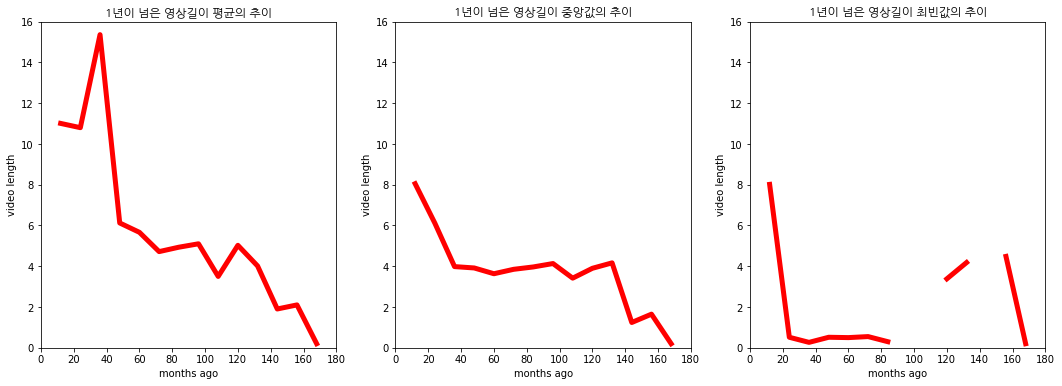

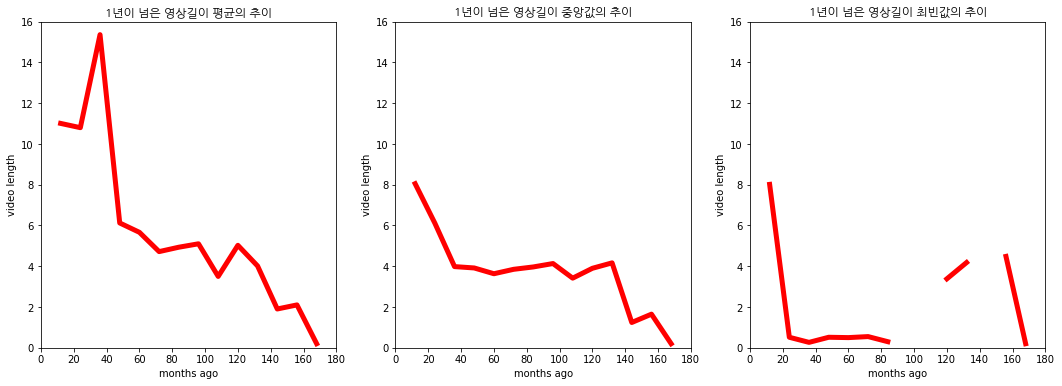

In [35]:
fig = plt.figure(figsize=(18,6))

# 1년이 넘은 영상 길이 평균의 추이
ax1 = fig.add_subplot(1, 3, 1)
ax1.set_xlabel('months ago')
ax1.set_ylabel('video length')
ax1.set_title('1년이 넘은 영상길이 평균의 추이', fontproperties=fontprop)
line1 = ax1.plot(data2.index,data2['mean'].minute_time, color='tomato')
plt.setp(line1, color='r', linewidth=5.0)
plt.axis([0, 180, 0, 16])


# 최근 1년이내 영상길이 중앙값의 추이
ax2 = fig.add_subplot(1, 3, 2)
ax2.set_xlabel('months ago')
ax2.set_ylabel('video length')
ax2.set_title('1년이 넘은 영상길이 중앙값의 추이', fontproperties=fontprop)
line2 = ax2.plot(data2.index,data2['median'].minute_time, color='tomato')
plt.setp(line2, color='r', linewidth=5.0)
plt.axis([0, 180, 0, 16])


# 최근 1년이내 영상길이 최빈값의 추이
# 너무 많이 최빈값이 나와 하나를 선택할 수 없으니 그냥 제거해버리자.
mode_data = data2['mode'].minute_time.apply(lambda x:np.nan if type(x)==type(np.array([])) else x)
mode_data

ax3 = fig.add_subplot(1, 3, 3)
ax3.set_xlabel('months ago')
ax3.set_ylabel('video length')
ax3.set_title('1년이 넘은 영상길이 최빈값의 추이', fontproperties=fontprop)
line3 = ax3.plot(mode_data, color='tomato')
plt.setp(line3, color='r', linewidth=5.0)
plt.axis([0, 180, 0, 16])

fig

* 이전에 1년이하의 최신영상과 같이 점점 최신으로 올수록 평균영상의 길이가 증가하였다.

* 점점 최신으로 들어올수록 영상의 중앙값 또한 증가하기는 마찬가지이다.

* 사실 12년전까지만 해도 10분이 넘어야 광고가 2개가 들어가서
* 10분인 영상이 가장 많을줄 알았지만.. 그러지 않았다.
* 그리고 최근 1,2년 사이에 영상길이가 8분대가 매우 많아진 것은 사실이다.

# 3 카테고리별 영상 길이

In [36]:
# youtube_nodouble_unique에 있는 channelId와 category_name 정보를 받아서
# channel_total의 데이터와 merge해서 분석을 해보자.

In [37]:
# channel_total

df1.head(1)

,channelId,video_time,video_id,when,title,minute_time,seconds_time,open,totalview,subscriber
0,UCu9BCtGIEr73LXZsKmoujKw,4:58,u6lyUnhaaqk,10일 전,.,4.966667,298.0,2014-08-25,2.683340e+09,3230000.0


In [38]:
# youtube_nodouble_unique

url2 = '/Users/namhunkim/Library/CloudStorage/OneDrive-연세대학교(YonseiUniversity)/DSL/EDA/data/main/youtube_nodouble_unique.csv'
df2 = pd.read_csv(url2,lineterminator='\n')
df2.head(1)

,video_id,title,publishedAt,channelId,channelTitle,trending_date,tags,view_count,likes,dislikes,comment_count,description,category_name,tag_num,period,Unnamed: 0,comments_disabled,ratings_disabled
0,uq5LClQN3cE,안녕하세요 보겸입니다,2020-08-09 09:32:48,UCu9BCtGIEr73LXZsKmoujKw,보겸 BK,2020-08-18 00:00:00,보겸|bokyem,6879571,53705,115494,128860,NaN,Entertainment,2,7,950.0,False,False


In [39]:
# channelId와 category_name과의 관계

print('채널당 카테고리가 몇개로 분류되는가\n')
print(df2.groupby('channelId').nunique().category_name.value_counts())

채널당 카테고리가 몇개로 분류되는가

1    2601
2     224
3      28
4       4
6       1
Name: category_name, dtype: int64


* channelId와 category_name이 1대1 대응이 아니다.
* 하지만 그렇다고 2개이상인 것들을 1개로 만들기도 어렵고
* 2개이상으로 데이터를 늘리기도 어렵다.
* 따라서 1대1 대응인 것만 사용하도록 한다.

#### channel_total로부터 정보 가져오기

In [40]:
df2.head(1)

,video_id,title,publishedAt,channelId,channelTitle,trending_date,tags,view_count,likes,dislikes,comment_count,description,category_name,tag_num,period,Unnamed: 0,comments_disabled,ratings_disabled
0,uq5LClQN3cE,안녕하세요 보겸입니다,2020-08-09 09:32:48,UCu9BCtGIEr73LXZsKmoujKw,보겸 BK,2020-08-18 00:00:00,보겸|bokyem,6879571,53705,115494,128860,NaN,Entertainment,2,7,950.0,False,False


In [41]:
# unique한 category_name을 가지고 있는 channelId를 가져오자.

same = df2.groupby('channelId').nunique().category_name
unique_category_channeId = same[same==1].index
unique_category_channeId

Index(['UC-0229MiVYnQoUxdLJnFl_g', 'UC-0C8yVGJy-cS4FGlYKelWw',
       'UC-0tICWyA0_AJAVMBHL8GdQ', 'UC-2Y8dQb0S6DtpxNgAKoJKA',
       'UC-2wa6jvprl7hfCpvw0ULzg', 'UC-3Fh1L6hOSV9ylvpr5g8_Q',
       'UC-5acDjU6XFWu-__G17V_YQ', 'UC-603KNB_fvzHP9MpBqSKWg',
       'UC-60AlFBYJEoItr-u-tQXbw', 'UC-7ZO1RZQq4O_xq9Zu8CyOg',
       ...
       'UCzjDgV-G8_J-iRbkYktqyGQ', 'UCzjPaOBCe0K2ma8XJzsNonA',
       'UCzlmktSjuctnZPBr94pu3iw', 'UCzm5GOElgUN-oLutNduDObA',
       'UCznImSIaxZR7fdLCICLdgaQ', 'UCzpOLMBZ6qxhb6GJ5eksq5A',
       'UCzw-C7fNfs018R1FzIKnlaA', 'UCzxXBQnJy9guqVNM6KXi0Ig',
       'UCzz58-H0wzmGoFi3MO_9ePQ', 'UCzznO4xSV8BKnUBPyswtCUw'],
      dtype='object', name='channelId', length=2601)

In [42]:
df1.head(1)

,channelId,video_time,video_id,when,title,minute_time,seconds_time,open,totalview,subscriber
0,UCu9BCtGIEr73LXZsKmoujKw,4:58,u6lyUnhaaqk,10일 전,.,4.966667,298.0,2014-08-25,2.683340e+09,3230000.0


In [43]:
# channelId의 카테고리이름이 유일한 channelId의 index를 1, 아니면 0으로 하는 열을 만든다.
# channel_total.csv의 channelId 데이터는 youtube_nodouble_unique.csv의 channelId 데이터 안에 포함된다.
# 따라서 channel_total.csv에서 channelId를 골라 youtube_nodouble_unique.csv에 있는 정보를 추출하면 된다.

idx = df1.channelId.apply(lambda x:1 if x in unique_category_channeId else 0)
idx = np.where(idx==1)[0]
idx

array([     0,      1,      2, ..., 217799, 217800, 217801])

In [44]:
# channel_total.csv에서 원하는 channelId와 when, minute_time 정보를 가져온다.

data1 = df1.iloc[idx,:].loc[:,['channelId','when','minute_time']]
data1

,channelId,when,minute_time
0,UCu9BCtGIEr73LXZsKmoujKw,10일 전,4.966667
1,UCu9BCtGIEr73LXZsKmoujKw,8개월 전,10.750000
2,UCu9BCtGIEr73LXZsKmoujKw,9개월 전,11.883333
3,UCu9BCtGIEr73LXZsKmoujKw,9개월 전,9.683333
4,UCu9BCtGIEr73LXZsKmoujKw,9개월 전,NaN
...,...,...,...
217797,UCLhgIX2L5ZCaWdlaxR_oTAg,7개월 전,0.516667
217798,UCLhgIX2L5ZCaWdlaxR_oTAg,7개월 전,0.500000
217799,UCLhgIX2L5ZCaWdlaxR_oTAg,8개월 전,0.516667
217800,UCLhgIX2L5ZCaWdlaxR_oTAg,8개월 전,0.500000


#### youtube_nodouble_unique으로부터 정보 가져오기

In [45]:
# youtube_nodouble_unique

df2.head(1)

,video_id,title,publishedAt,channelId,channelTitle,trending_date,tags,view_count,likes,dislikes,comment_count,description,category_name,tag_num,period,Unnamed: 0,comments_disabled,ratings_disabled
0,uq5LClQN3cE,안녕하세요 보겸입니다,2020-08-09 09:32:48,UCu9BCtGIEr73LXZsKmoujKw,보겸 BK,2020-08-18 00:00:00,보겸|bokyem,6879571,53705,115494,128860,NaN,Entertainment,2,7,950.0,False,False


In [46]:
# channelId의 카테고리이름이 유일한 channelId의 index를 1, 아니면 0으로 하는 열을 만든다.

idx1 = df2.channelId.apply(lambda x:1 if x in unique_category_channeId else 0)
idx1 = np.where(idx1==1)[0]
idx1

array([    0,     1,     3, ..., 16925, 16926, 16927])

In [47]:
# youtube_nodouble_unique.csv에서 원하는 channelId와 when, minute_time 정보를 가져온다.

data2 = df2.iloc[idx1,:].loc[:,['channelId','category_name','view_count']]
data2

,channelId,category_name,view_count
0,UCu9BCtGIEr73LXZsKmoujKw,Entertainment,6879571
1,UCRuSxVu4iqTK5kCh90ntAgA,Film & Animation,1683060
3,UCkQCwnkQfgSuPTTnw_Y7v7w,Entertainment,2272383
4,UCaO6TYtlC8U5ttz62hTrZgg,Music,12533252
5,UCaO6TYtlC8U5ttz62hTrZgg,Music,12225212
...,...,...,...
16923,UCw1DsweY9b2AKGjV4kGJP1A,Gaming,499672
16924,UCw1DsweY9b2AKGjV4kGJP1A,Gaming,456567
16925,UCLhgIX2L5ZCaWdlaxR_oTAg,Film & Animation,3027157
16926,UCsXigGjbC_l4ttk-oahTfVg,Music,110679


#### channel_total에서 추출한 data1과 youtube_nodouble_unique에서 추출한 data2의 정보를 합치자.

In [48]:
data1.head(1)

,channelId,when,minute_time
0,UCu9BCtGIEr73LXZsKmoujKw,10일 전,4.966667


In [49]:
data2.head(1)

,channelId,category_name,view_count
0,UCu9BCtGIEr73LXZsKmoujKw,Entertainment,6879571


In [50]:
data_total = pd.merge(data1, data2, on='channelId')
data_total = data_total.drop(['channelId'], axis=1)
data_total

,when,minute_time,category_name,view_count
0,10일 전,4.966667,Entertainment,6879571
1,10일 전,4.966667,Entertainment,2916194
2,10일 전,4.966667,Entertainment,2688958
3,10일 전,4.966667,Entertainment,1161298
4,10일 전,4.966667,Entertainment,1389367
...,...,...,...,...
1077279,7개월 전,0.516667,Film & Animation,3027157
1077280,7개월 전,0.500000,Film & Animation,3027157
1077281,8개월 전,0.516667,Film & Animation,3027157
1077282,8개월 전,0.500000,Film & Animation,3027157


#### 카테고리별(category_name)로 동영상시간(minute_time)의 대푯값들(mean,median,mode)을 구해보자.

In [51]:
data = data_total.loc[:,['category_name','minute_time']]
data.head(1)

,category_name,minute_time
0,Entertainment,4.966667


In [52]:
grouped = pd.concat([data.groupby('category_name').mean(), data.groupby('category_name').median(),
                     data.groupby(['category_name']).agg(pd.Series.mode)], axis=1)
grouped.columns = ['mean','median','mode']
grouped

,mean,median,mode
category_name,,,
Autos & Vehicles,11.947584,9.633333,0.266667
Comedy,10.792170,8.358333,8.016667
Education,23.792839,11.300000,8.016667
Entertainment,11.363302,8.100000,1.016667
Film & Animation,7.866734,4.616667,4.116667
Gaming,19.596324,8.800000,8.033333
Howto & Style,10.064104,7.966667,8.016667
Music,9.055634,3.583333,0.516667
News & Politics,25.566695,9.483333,0.583333


In [53]:
# Nonprofits & Activism의 경우에는 관심이 없기도 하고 mode(최빈값)이 여러개가 나옴으로
# 제거를 해주자.

grouped = grouped.drop('Nonprofits & Activism')
grouped

,mean,median,mode
category_name,,,
Autos & Vehicles,11.947584,9.633333,0.266667
Comedy,10.792170,8.358333,8.016667
Education,23.792839,11.300000,8.016667
Entertainment,11.363302,8.100000,1.016667
Film & Animation,7.866734,4.616667,4.116667
Gaming,19.596324,8.800000,8.033333
Howto & Style,10.064104,7.966667,8.016667
Music,9.055634,3.583333,0.516667
News & Politics,25.566695,9.483333,0.583333


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


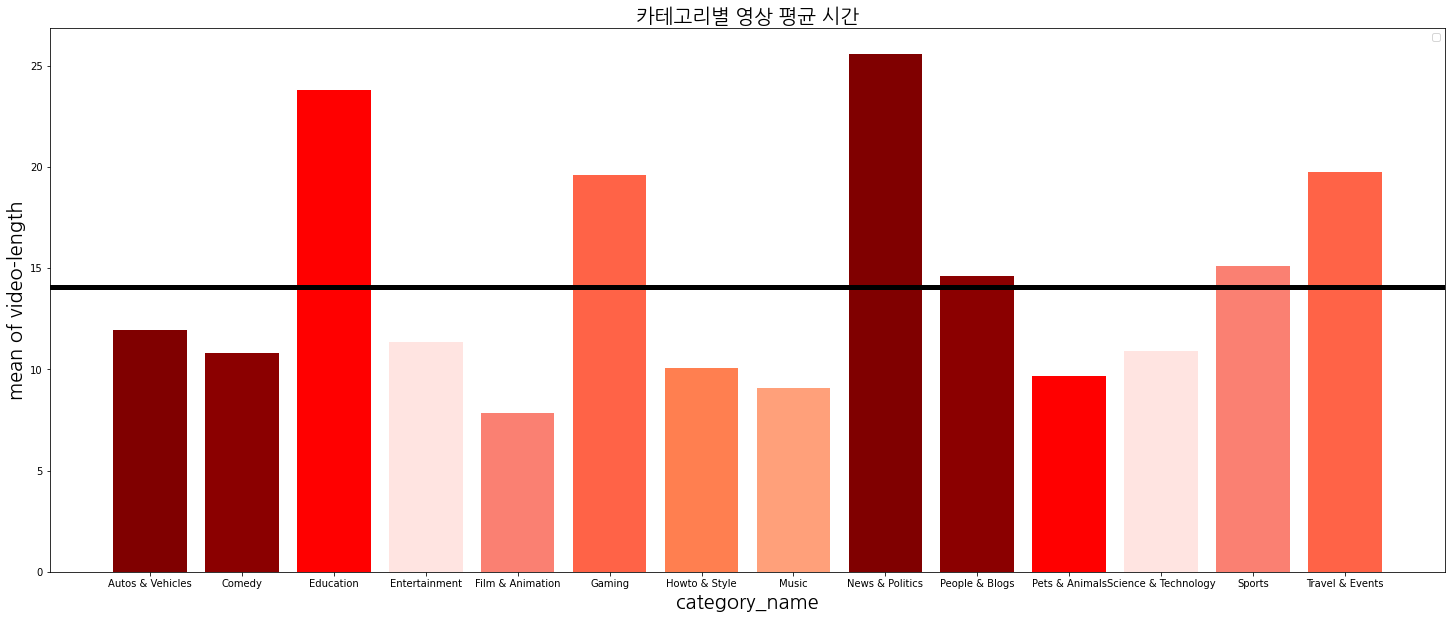

In [54]:
# 카테고리별 대푯값 시각적인 확인(1.평균)
fontprop = fm.FontProperties(fname=path, size=20)
plt.figure(figsize=(25,10))
plt.bar(grouped.index, grouped.iloc[:,0], color=['maroon','darkred','red','mistyrose','salmon','tomato','coral','lightsalmon'])
plt.axhline(df1.minute_time.mean(), color='black',linewidth=5) # 전체 평균
plt.xlabel('category_name', fontproperties=fontprop)
plt.ylabel('mean of video-length', fontproperties=fontprop)
plt.title('카테고리별 영상 평균 시간', fontproperties=fontprop)
plt.legend()
plt.show()

* 전체 평균보다 낮은 카테고리가 조금 더 많다.
* 전체 평균보다 압도적으로 높은 카테고리는 [Education, Gaming, News&Politics, Travel&Events]이다.

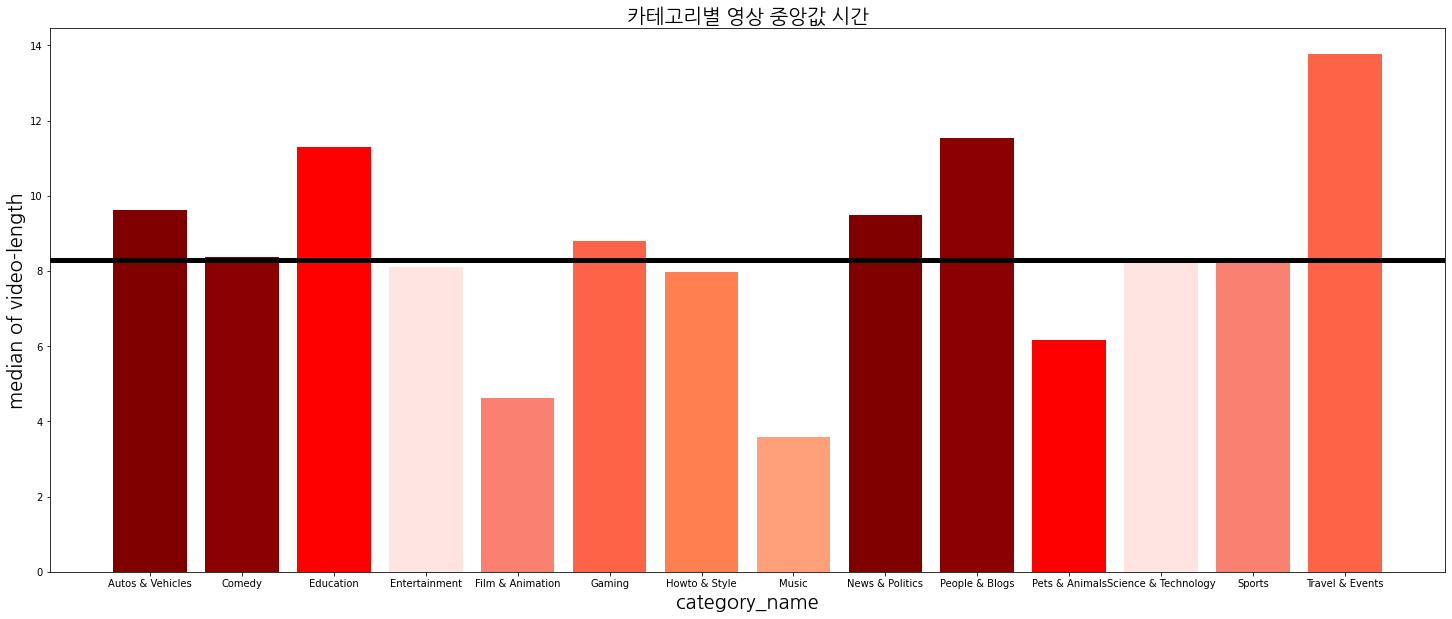

In [55]:
# 카테고리별 대푯값 시각적인 확인(2.중앙값)
plt.figure(figsize=(25,10))
plt.bar(grouped.index, grouped.iloc[:,1],color=['maroon','darkred','red','mistyrose','salmon','tomato','coral','lightsalmon'])
plt.axhline(df1.minute_time.median(), color='black',linewidth=5) # 전체 중앙값
plt.xlabel('category_name', fontproperties=fontprop)
plt.ylabel('median of video-length', fontproperties=fontprop)
plt.title('카테고리별 영상 중앙값 시간', fontproperties=fontprop)
plt.show()

* 전체 평균보다 낮은 카테고리가 조금 더 많다.
* 전체 평균보다 압도적으로 높은 카테고리는 [Education, Gaming, News&Politics, Travel&Events]이다.

* 카테고리별 중앙값은 대부분 전체 중앙값에 가깝도록 나온다.
* 하지만 그럼에도 크게 벗어나는 카테고리가 있는데, [Films&Animation, Music, Pets&Animals]가 적은 값을 가지고
* [Education, People&Blogs, Travel&Events]가 큰 값을 가진다.

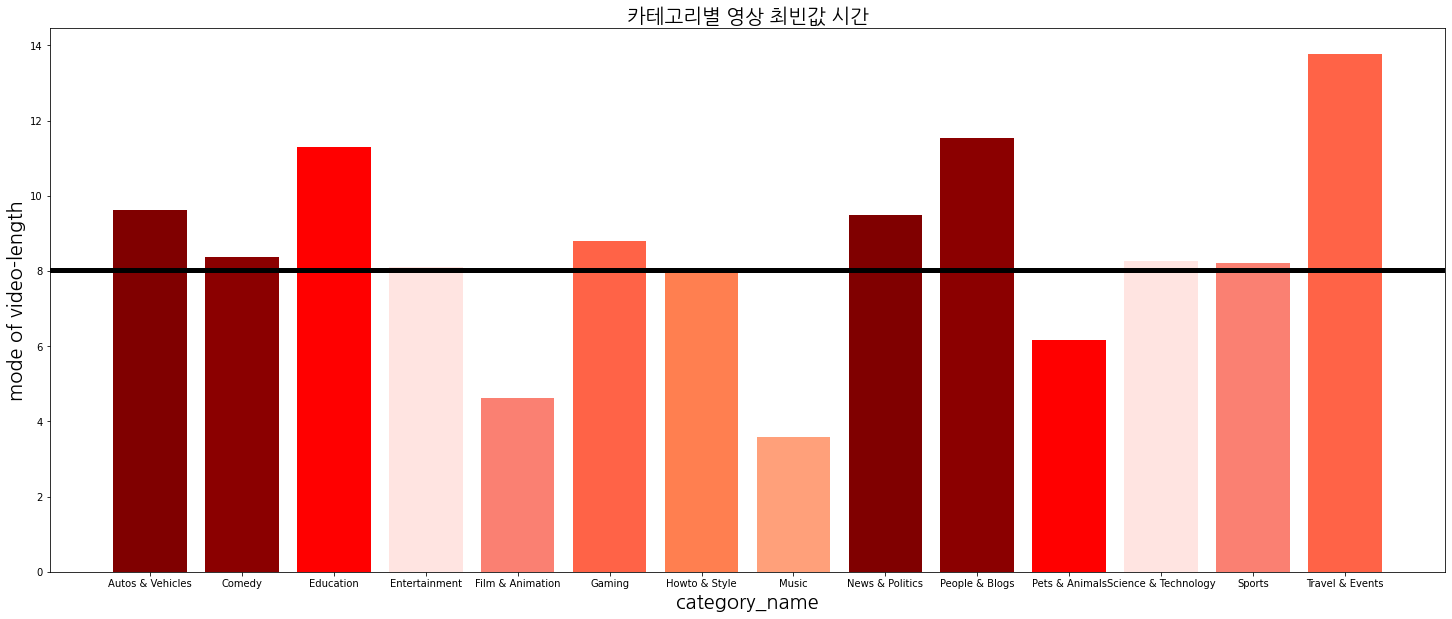

In [56]:
# 카테고리별 대푯값 시각적인 확인(3.최빈값)
plt.figure(figsize=(25,10))
plt.bar(grouped.index, grouped.iloc[:,1],color=['maroon','darkred','red','mistyrose','salmon','tomato','coral','lightsalmon'])
plt.axhline(df1.minute_time.agg(pd.Series.mode)[0], color='black',linewidth=5) # 전체 중앙값
plt.xlabel('category_name', fontproperties=fontprop)
plt.ylabel('mode of video-length', fontproperties=fontprop)
plt.title('카테고리별 영상 최빈값 시간', fontproperties=fontprop)
plt.show()

* 전체 평균보다 낮은 카테고리가 조금 더 많다.
* 전체 평균보다 압도적으로 높은 카테고리는 [Education, Gaming, News&Politics, Travel&Events]이다.

* 카테고리별 중앙값은 대부분 전체 중앙값에 가깝도록 나온다.
* 하지만 그럼에도 크게 벗어나는 카테고리가 있는데, [Films&Animation, Music, Pets&Animals]가 적은 값을 가지고
* [Education, People&Blogs, Travel&Events]가 큰 값을 가진다.

* 전체 영상의 최빈값은 8이며, 대부분이 8분이나, [Film&Animation, Music, Pets&Animals]가 작은 값을 가지고
* [Education, People&Blogs, Travel&Events]가 큰 값을 가진다.


#### 결론
* 따라서 평균이 높은 'Gaming'과 'News&Politics'가 중앙값과 최빈값은 그러지 않는 것으로 보아
* 이 두 카테고리는 대부분의 영상이 8분이나 일부 영상의 길이가 매우 길어 평균에 영향을 주는 것 같다.

* 그리고 보통적으로 [Films&Animation, Music, Pets&Animals]은 적은 영상길이를
* [Education, People&Blogs, Travel&Events]은 긴 영상의 길이를 가진다.

# 4. 동영상길이별 조회수확인; 동영상길이에 대한 수요

In [57]:
# channel_total <- 인기채널의 영상을 대략 90개씩 크롤링해온 데이터
# 이 데이터로부터는 영상의 재생길이를 얻고자한다.

url1 = '/Users/namhunkim/Library/CloudStorage/OneDrive-연세대학교(YonseiUniversity)/DSL/EDA/data/main/channel_total.csv'
df1 = pd.read_csv(url1,lineterminator='\n')
df1.head(1)

,channelId,video_time,video_id,when,title,minute_time,seconds_time,open,totalview,subscriber
0,UCu9BCtGIEr73LXZsKmoujKw,4:58,u6lyUnhaaqk,10일 전,.,4.966667,298.0,2014-08-25,2.683340e+09,3230000.0


In [58]:
# youtube_nodouble <- 인기동영상에 대한 데이터
# 이 데이터로부터는 영상의 조회수를 얻고자한다.

url2 = '/Users/namhunkim/Library/CloudStorage/OneDrive-연세대학교(YonseiUniversity)/DSL/EDA/data/main/youtube_nodouble.csv'
df2 = pd.read_csv(url2,lineterminator='\n')
df2.head(1)

,Unnamed: 0,video_id,title,publishedAt,channelId,channelTitle,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,category_name,tag_num
0,0,uq5LClQN3cE,안녕하세요 보겸입니다,2020-08-09 09:32:48,UCu9BCtGIEr73LXZsKmoujKw,보겸 BK,2020-08-12 00:00:00,보겸|bokyem,5947503,53326,105756,139946,False,False,NaN,Entertainment,2


겹치는 video_id를 토대로 그 자료를 가져오자.

In [59]:
# channel_total의 비디오아이디와 재생시간

df3 = df1.loc[:,['video_id','minute_time']]
df3.head(1)

,video_id,minute_time
0,u6lyUnhaaqk,4.966667


In [60]:
# youtube_nodouble의 비디오아이디와 조회수(1)

df4 = df2.groupby('video_id').mean().view_count # 평균을 사용
df5 = df2.groupby('video_id').median().view_count # 중앙값을 사용
print(df4.head(1),'\n')
print(df5.head(1),'\n')

video_id
--8IwTcvN98    514801.222222
Name: view_count, dtype: float64 

video_id
--8IwTcvN98    543198.0
Name: view_count, dtype: float64 



In [61]:
# youtube_nodouble의 비디오아이디와 조회수(2)
# 데이터프레임형태로 변환

df6 = pd.concat([pd.Series(df4.index.values),pd.Series(df4.values),pd.Series(df5.values)],axis=1)
df6.columns = ['video_id','view_count_mean','view_count_median']
df6.head(1)

,video_id,view_count_mean,view_count_median
0,--8IwTcvN98,514801.222222,543198.0


In [62]:
# 겹치는 video_id의 갯수 확인

same_video_id = np.intersect1d(df3.video_id.values, df6.video_id.values)
print(same_video_id,'\n')
print(len(same_video_id))

['--8IwTcvN98' '--FmExEAsM8' '-1HI2yiZ8Lg' ... 'zvvVmwoIEDU' 'zwuB-Y-iqIw'
 'zxuLVGPwGWY'] 

5277


In [63]:
# 동일한 video_id를 기준으로 두 데이터에서 각각 재생시간과 조회수를 가져와 합친다.

data = pd.merge(df3, df6, how="inner", on='video_id')
data

,video_id,minute_time,view_count_mean,view_count_median
0,6MiItImFYbk,9.683333,1.349944e+06,1405934.5
1,tPvKxYXouDY,8.366667,1.509278e+06,1590874.0
2,uZ63Kbaz9UA,11.450000,1.211395e+06,1251976.5
3,QCMVsxYcC8M,8.050000,1.855166e+06,1905973.0
4,Fm1m-UwUcYY,10.066667,1.871186e+06,1882573.0
...,...,...,...,...
5272,WvpfhCuM9aY,4.116667,1.921563e+05,195267.5
5273,zXiJZZkWAHs,3.233333,8.294753e+05,675614.0
5274,fj-fho49sfE,2.133333,1.880817e+05,196895.0
5275,MFkuTEkyMu0,21.850000,1.314210e+05,131421.0


In [64]:
# np.intersect1d로 뽑은 video_id와 merge로 뽑은 video_id가 같다.
# 즉, 제대로 한 것이 맞다!

(np.intersect1d(data.video_id, same_video_id) == same_video_id).all()

True

(1) 조회수의 평균에 대해 확인

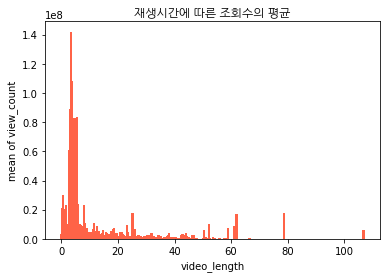

In [65]:
# 전체 데이터의 재생시간에 따른 조회수 분포
fontprop = fm.FontProperties(fname=path, size=12)

plt.title('재생시간에 따른 조회수의 평균', fontproperties=fontprop)
plt.xlabel('video_length')
plt.ylabel('mean of view_count')
plt.bar(data.minute_time,data.view_count_mean, color='tomato')
plt.show()

#### 0~20대만을 짤라서 확인해보자.

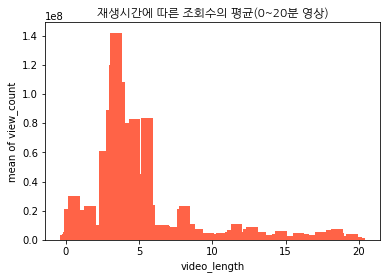

In [66]:
idx1 = np.where(data.minute_time<20)[0]

plt.title('재생시간에 따른 조회수의 평균(0~20분 영상)', fontproperties=fontprop)
plt.xlabel('video_length')
plt.ylabel('mean of view_count')
plt.bar(data.minute_time.iloc[idx1],data.view_count_mean.iloc[idx1], color='tomato')
plt.show()

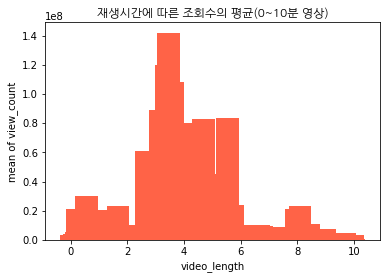

In [67]:
# 0~10분으로 더 명확하게 확인해보자.

idx2 = np.where(data.minute_time<10)[0]

plt.title('재생시간에 따른 조회수의 평균(0~10분 영상)', fontproperties=fontprop)
plt.xlabel('video_length')
plt.ylabel('mean of view_count')
plt.bar(data.minute_time.iloc[idx2],data.view_count_mean.iloc[idx2], color='tomato')
plt.show()

* 대략 3분의 영상시간을 갖는 영상에 대해 가장 많은 조회수가 나온다.
* 그 다음은 4~5분대도 조회수가 꽤 나온다.
* 그 다음은 1~2분대, 8분대이다.

#### 40분이후 대만을 짤라서 확인해보자.

/Users/namhunkim/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/namhunkim/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/namhunkim/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/namhunkim/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/namhunkim/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from cu

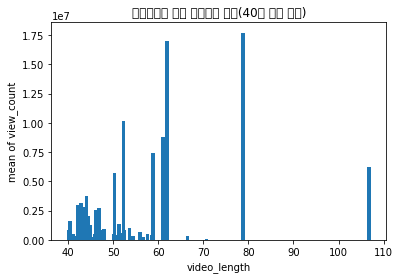

In [68]:
# 40분이 넘는 영상에 대한 조회수 평균 확인

idx3 = np.where(data.minute_time>40)[0]

plt.title('재생시간에 따른 조회수의 평균(40분 이상 영상)')
plt.xlabel('video_length')
plt.ylabel('mean of view_count')
plt.bar(data.minute_time.iloc[idx3],data.view_count_mean.iloc[idx3])
plt.show()

* 60,80분정도 영상에 대한 수요가 꽤 많다.
* 그리고 50,100분 정도도 괜찮은 조회수가 나온다.

(2) 조회수의 중앙값에 대해 확인

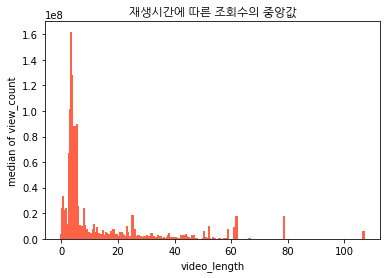

In [69]:
# 전체 데이터의 재생시간에 따른 조회수 분포

plt.title('재생시간에 따른 조회수의 중앙값', fontproperties=fontprop)
plt.xlabel('video_length')
plt.ylabel('median of view_count')
plt.bar(data.minute_time,data.view_count_median, color='tomato')
plt.show()

#### 0~20대만을 짤라서 확인해보자.

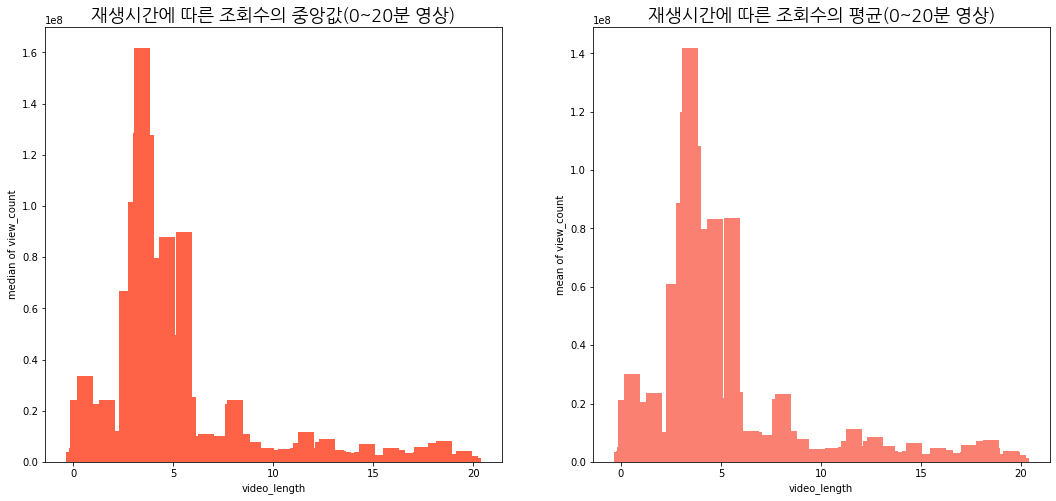

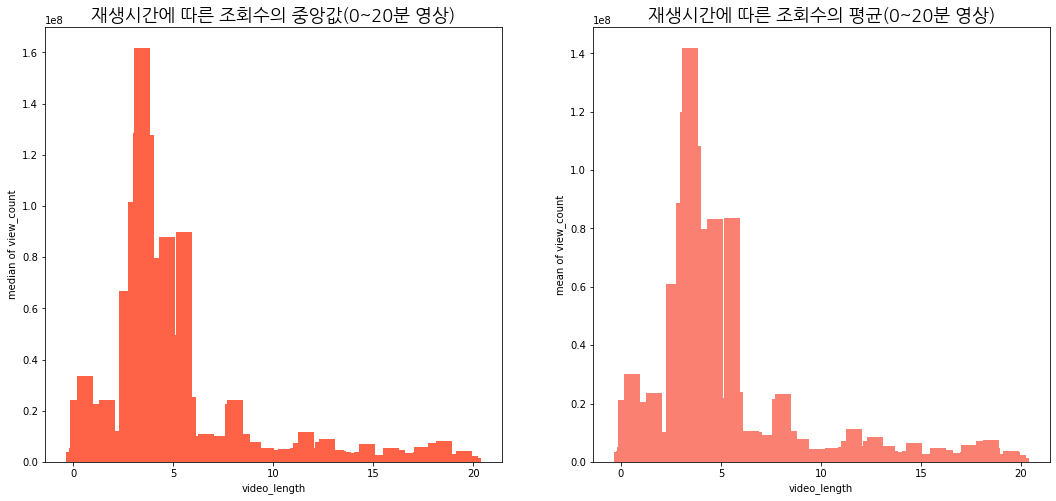

In [70]:
fontprop = fm.FontProperties(fname=path, size=18)

fig = plt.figure(figsize=(18,8))

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_xlabel('video_length')
ax1.set_ylabel('median of view_count')
ax1.set_title('재생시간에 따른 조회수의 중앙값(0~20분 영상)', fontproperties=fontprop)
ax1.bar(data.minute_time.iloc[idx1],data.view_count_median.iloc[idx1], color='tomato')

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_xlabel('video_length')
ax2.set_ylabel('mean of view_count')
ax2.set_title('재생시간에 따른 조회수의 평균(0~20분 영상)', fontproperties=fontprop)
ax2.bar(data.minute_time.iloc[idx1],data.view_count_mean.iloc[idx1], color='salmon')

fig

* 약간의 차이는 있으나, 거의 비슷한 형태이다.

0~10분으로 더 명확하게 확인해보자.


<BarContainer object of 2428 artists>

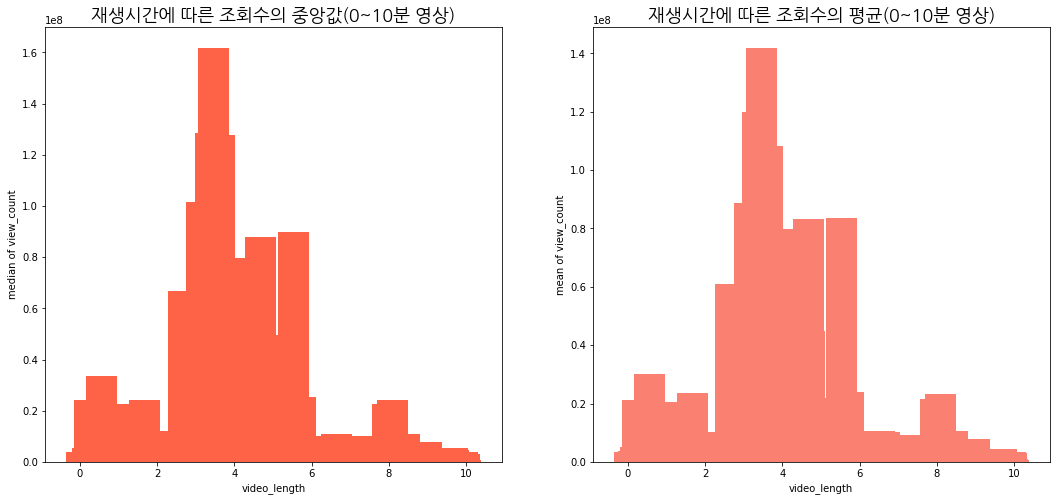

In [71]:
fig = plt.figure(figsize=(18,8))

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_xlabel('video_length')
ax1.set_ylabel('median of view_count')
ax1.set_title('재생시간에 따른 조회수의 중앙값(0~10분 영상)', fontproperties=fontprop)
ax1.bar(data.minute_time.iloc[idx2],data.view_count_median.iloc[idx2], color='tomato')

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_xlabel('video_length')
ax2.set_ylabel('mean of view_count')
ax2.set_title('재생시간에 따른 조회수의 평균(0~10분 영상)', fontproperties=fontprop)
ax2.bar(data.minute_time.iloc[idx2],data.view_count_mean.iloc[idx2], color='salmon')

* 약간의 차이는 있으나, 거의 비슷한 형태이다.
* 따라서 이전과 같이 결론을 내려도 될 것 같다.

<BarContainer object of 63 artists>

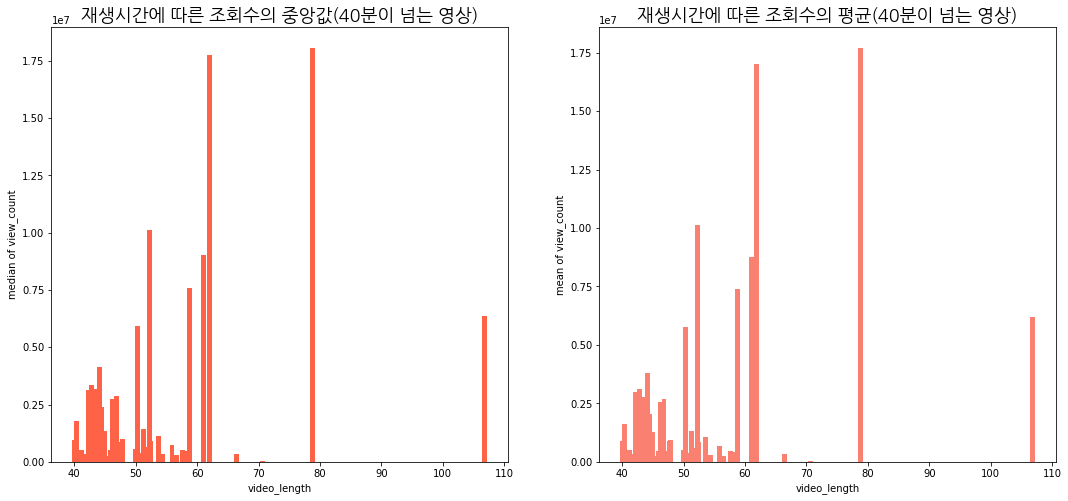

In [72]:
# 40분이 넘는 영상에 대한 조회수 평균 확인

fig = plt.figure(figsize=(18,8))

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_xlabel('video_length')
ax1.set_ylabel('median of view_count')
ax1.set_title('재생시간에 따른 조회수의 중앙값(40분이 넘는 영상)', fontproperties=fontprop)
ax1.bar(data.minute_time.iloc[idx3],data.view_count_median.iloc[idx3], color='tomato')

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_xlabel('video_length')
ax2.set_ylabel('mean of view_count')
ax2.set_title('재생시간에 따른 조회수의 평균(40분이 넘는 영상)', fontproperties=fontprop)
ax2.bar(data.minute_time.iloc[idx3],data.view_count_mean.iloc[idx3], color='salmon')

* 40분이 넘는 영상도 마찬가지이다.